# Creating a scraper using phantomjs - first trial on local machine, for future use in EC2 instance 
- do what it takes to make phantomjs work: 
    - instantiate the correct assembly of software with appropriate parameters (e.g phantomjs)
    - correct instantiation of a "browser" 
    - make sure website does not reject me 
    - verify that it is working (use image capture) 
    - process data (preprocess for storage and future analysis)
    - store captured data appropriately (use S3 bucket)  

In [1]:
import time
from urllib import urlencode
from selenium import webdriver
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
from bs4 import BeautifulSoup as BS
import random
import requests
import pymongo
import pandas as pd
import re
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from IPython.display import Image
import boto3
import cPickle
import os

In [2]:
dcap = dict(DesiredCapabilities.PHANTOMJS)

In [3]:
dcap

{'browserName': 'phantomjs',
 'javascriptEnabled': True,
 'platform': 'ANY',
 'version': ''}

In [19]:
dcap["phantomjs.page.settings.userAgent"] = (
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36/"
)

In [5]:
browser = webdriver.PhantomJS(desired_capabilities=dcap)
browser.implicitly_wait(10) 

In [20]:
browser.set_window_size(839, 937)

In [9]:
browser = webdriver.PhantomJS()

In [10]:
browser.desired_capabilities

{u'acceptSslCerts': False,
 u'applicationCacheEnabled': False,
 u'browserConnectionEnabled': False,
 u'browserName': u'phantomjs',
 u'cssSelectorsEnabled': True,
 u'databaseEnabled': False,
 u'driverName': u'ghostdriver',
 u'driverVersion': u'1.2.0',
 u'handlesAlerts': False,
 u'javascriptEnabled': True,
 u'locationContextEnabled': False,
 u'nativeEvents': True,
 u'platform': u'mac-unknown-64bit',
 u'proxy': {u'proxyType': u'direct'},
 u'rotatable': False,
 u'takesScreenshot': True,
 u'version': u'2.1.1',
 u'webStorageEnabled': False}

In [21]:
browser.close()

In [12]:
browser = webdriver.PhantomJS(desired_capabilities=dcap)

In [13]:
browser.desired_capabilities

{u'acceptSslCerts': False,
 u'applicationCacheEnabled': False,
 u'browserConnectionEnabled': False,
 u'browserName': u'phantomjs',
 u'cssSelectorsEnabled': True,
 u'databaseEnabled': False,
 u'driverName': u'ghostdriver',
 u'driverVersion': u'1.2.0',
 u'handlesAlerts': False,
 u'javascriptEnabled': True,
 u'locationContextEnabled': False,
 u'nativeEvents': True,
 u'phantomjs.page.settings.userAgent': u'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36/',
 u'platform': u'mac-unknown-64bit',
 u'proxy': {u'proxyType': u'direct'},
 u'rotatable': False,
 u'takesScreenshot': True,
 u'version': u'2.1.1',
 u'webStorageEnabled': False}

In [14]:
 browser.get("http://allrecipes.com/cook/5255353/about-me/")

In [15]:
page = browser.page_source

In [16]:
browser.save_screenshot("img.png")

True

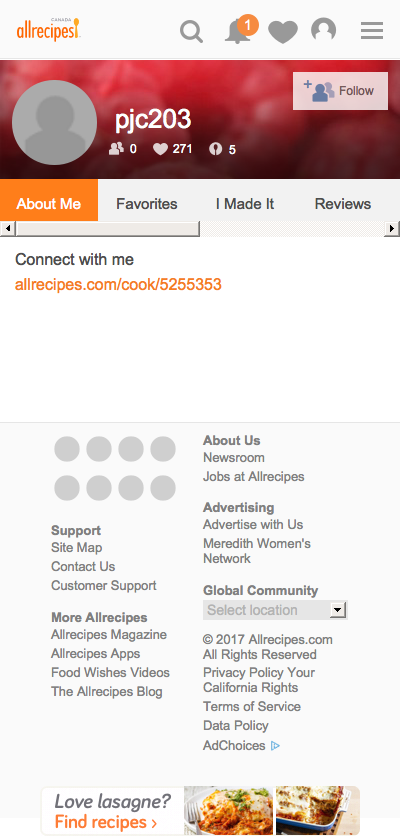

In [17]:
Image('img.png')